In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cases = ['tjet_Le1B_LGHE', 'tjet_Le1B_HGLE', 'tjet_Le1B_HGHE']
labels = ['LGHE', 'HGLE', 'HGHE']

# ODT Cases Side-by-side Contour Plots

In [10]:
arr = np.arange(0,10)
arr.take(range(3,2), mode='wrap')

array([], dtype=int32)

In [26]:
def side_by_side(phi='T', units='K'):
    plt.rcParams.update({'font.size': 14})
    fig=plt.figure(figsize=(8,6))

    # Determine which case has the highest phi value
    max_i = None
    max_value = -np.inf
    for i, case in enumerate(cases):
        odtdata = np.loadtxt(f'{case}/{phi}_ODT.txt')
        max_case_value = np.max(odtdata)
        if max_case_value > max_value:
            max_value = max_case_value
            max_i = i
    
    # Load data
    levels = None
    for j in range(len(cases)):
        i = (j + max_i) % len(cases)
        case = cases[i]
        ODT_xs = np.loadtxt(f'{case}/xVals.txt')
        ODT_ts = np.loadtxt(f'{case}/tVals.txt')
        odtdata = np.loadtxt(f'{case}/{phi}_ODT.txt')

        xx, tt = np.meshgrid(ODT_xs, ODT_ts[:39])
        ax = plt.subplot(1, len(cases), i+1)
        ax.set_title(labels[i])
        ax.set_xlabel('x (m)')
        
        if j == 0:
            # Set levels on using the first plot (global max phi)
            contour = ax.contourf(xx,tt,odtdata.T, 100, cmap='inferno')
            levels = contour.levels
        else:
            # Base other plots' levels on the first plot
            contour = ax.contourf(xx,tt,odtdata.T, levels, cmap='inferno')

        if i == 0:
            # Set y-axis ticks and labels for the first plot
            ax.set_ylabel('t (s)')
        else:
            # Remove y-axis ticks and labels for other plots
            ax.set_yticks([])
            ax.set_yticklabels([])

    plt.tight_layout()
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.82, 0.13, 0.05, 0.7])
    cbar = fig.colorbar(contour, cax=cbar_ax)
    cbar.set_label(f'{phi} ({units})', rotation=270, labelpad=20)
    plt.show();

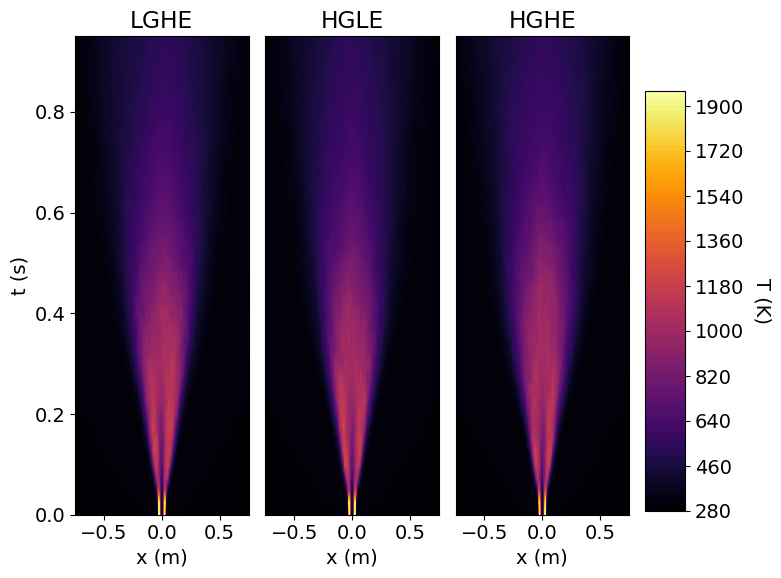

In [27]:
side_by_side('T', 'K')

# ODT Scatter in Mixture Fraction Space